Лабораторна робота №3 

Завдання 1. Провести розвідувальний аналіз даних EDA (Exploratory
data analysis) на наборі даних mlbootcamp_train_Soroka.csv

З бібліотек знадобляться : 

In [2]:
  import numpy as np 
  import pandas as pd 
  import matplotlib.ticker 
  import matplotlib.pyplot as plt 
  import seaborn as sns  
  
# ігноруємо warnings 
  import warnings 
  warnings.filterwarnings("ignore") 

Проведемо налаштування зовнішнього вигляду графіків у seaborn:

In [19]:
sns.set_context(
    "notebook",
    font_scale = 1.2,
    rc = {
        "figure.figsize" : (12, 9),
        "axes.titlesize" : 8
        } ) 

Зчитаємо дані з CSV-файлу в об'єкт pandas DataFrame.

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/mlbootcamp5_train.csv', sep=';',index_col='id')

Подивитися на перші 5 записів та розмір Dataset:

In [5]:
print(df.head())

      age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke   
id                                                                          
0   18393       2     168    62.0    110     80            1     1      0  \
1   20228       1     156    85.0    140     90            3     1      0   
2   18857       1     165    64.0    130     70            3     1      0   
3   17623       2     169    82.0    150    100            1     1      0   
4   17474       1     156    56.0    100     60            1     1      0   

    alco  active  cardio  
id                        
0      0       1       0  
1      0       1       1  
2      0       0       1  
3      0       1       1  
4      0       0       0  


In [ ]:
print(df.shape)

(70000, 12)


Переведемо дані в «Long Format» - представлення та проведемо візуалізацію даних за допомогою factorplot значень, які приймають категоріальні змінні

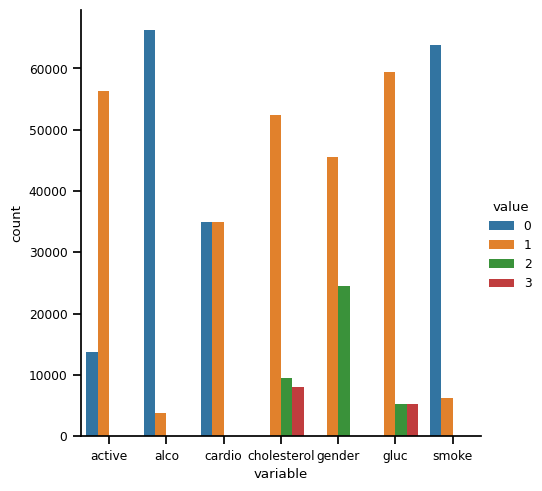

In [14]:
df_uniques = pd.melt(frame=df, 
                     value_vars=['gender','cholesterol','gluc','smoke', 'alco','active', 'cardio'])  
df_uniques = pd.DataFrame(df_uniques.groupby(['variable','value'])['value']
                          .count())\
                          .sort_index(level=[0, 1])\
                          .rename(columns={'value': 'count'})\
                          .reset_index()   
sns.catplot(x='variable', y='count', hue='value', data=df_uniques, kind='bar') 

На графіку можна побачити, що класи цільової змінної cardio збалансовані. 

Також зрозбимо елементи вибірки за значеннями цільової змінної: іноді на таких графіках можна відразу побачити найбільш значиму ознаку. 

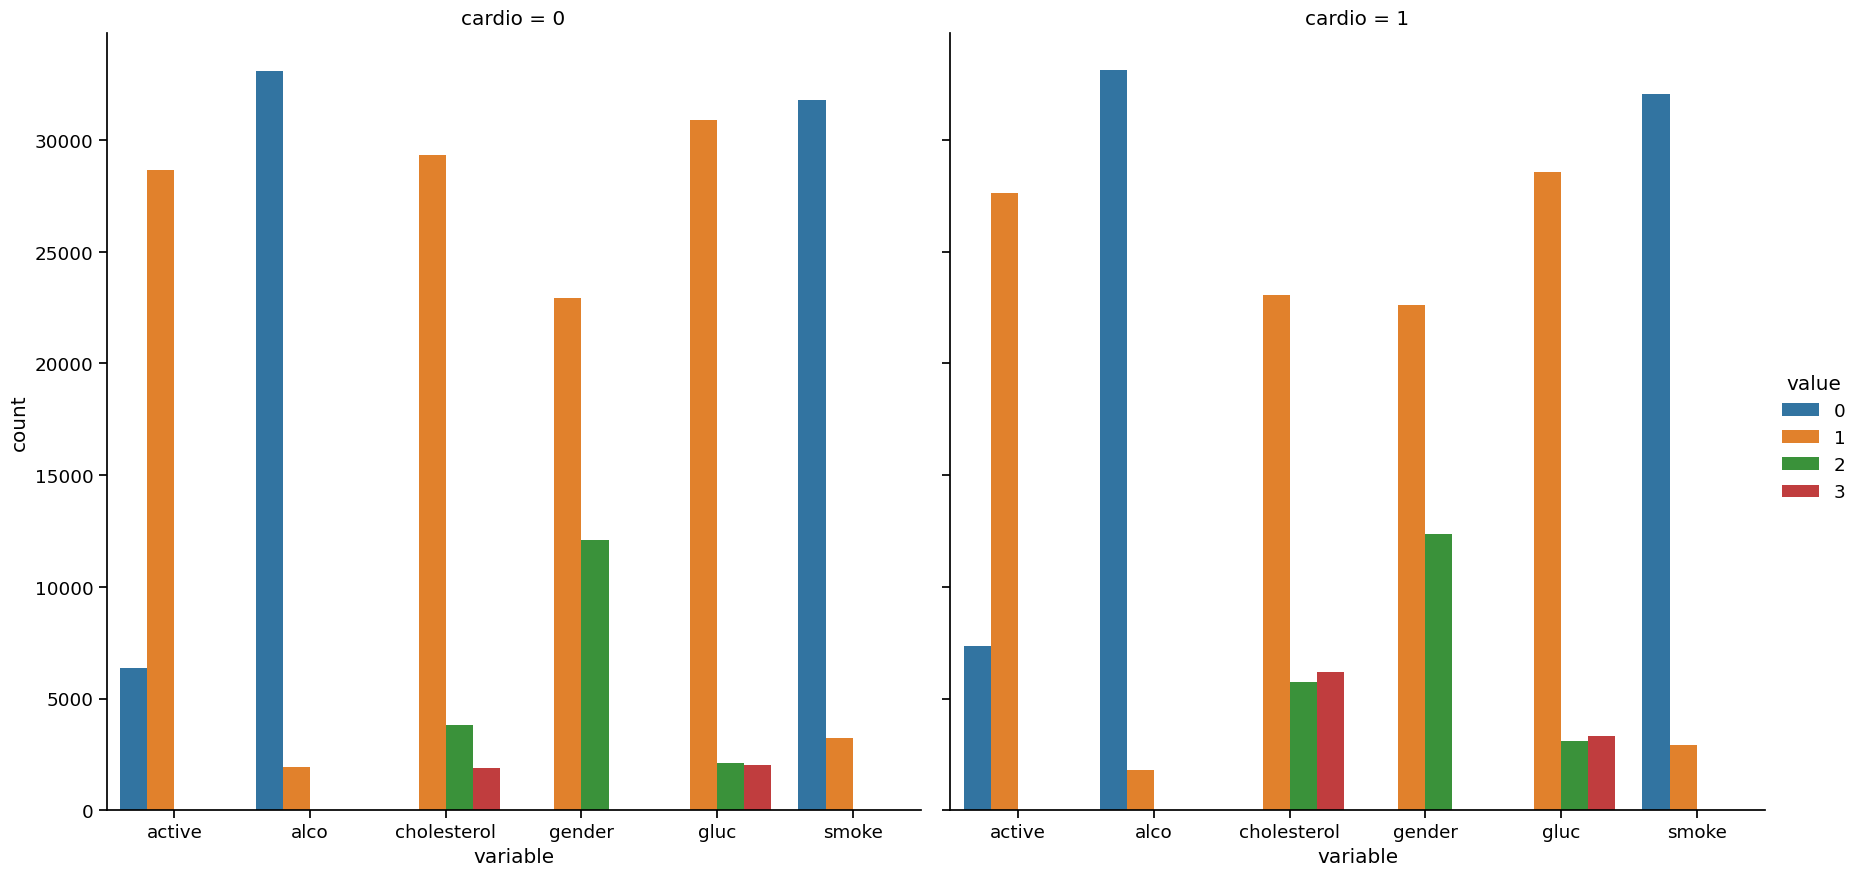

In [21]:
df_uniques = pd.melt(frame=df,
                     value_vars=['gender','cholesterol','gluc','smoke', 'alco', 'active'],
                     id_vars=['cardio'])

df_uniques = pd.DataFrame(df_uniques.groupby(['variable', 'value', 'cardio'])['value']
                          .count())\
                          .sort_index(level=[0, 1])\
                          .rename(columns={'value': 'count'})\
                          .reset_index()

sns.catplot(x='variable', y='count', hue='value', col='cardio', data=df_uniques, kind='bar', height=9)

plt.show() 

По отриманим графікам можна побачити, що в залежності від цільової змінної (cardio) сильно змінюється розподіл холестерину і глюкози.  

Статистику за унікальними значеннями ознак отримаємо за допомогою наступного коду: 

In [22]:
for c in df.columns: 
  n = df[c].nunique() 
  print(c) 
  if n <= 3: 
    print(n, sorted(df[c].value_counts().to_dict().items())) 
  else: print(n) 
print(10 * '-') 

age
8076
gender
2 [(1, 45530), (2, 24470)]
height
109
weight
287
ap_hi
153
ap_lo
157
cholesterol
3 [(1, 52385), (2, 9549), (3, 8066)]
gluc
3 [(1, 59479), (2, 5190), (3, 5331)]
smoke
2 [(0, 63831), (1, 6169)]
alco
2 [(0, 66236), (1, 3764)]
active
2 [(0, 13739), (1, 56261)]
cardio
2 [(0, 35021), (1, 34979)]
----------


Завдання 2. Провести візуальний аналіз набору даних mlbootcamp_train_Soroka.csv

Побудуйте кореляційну матрицю (heatmap). Матриця формується засобами Pandas, зі стандартним значенням параметрів. 

<Axes: >

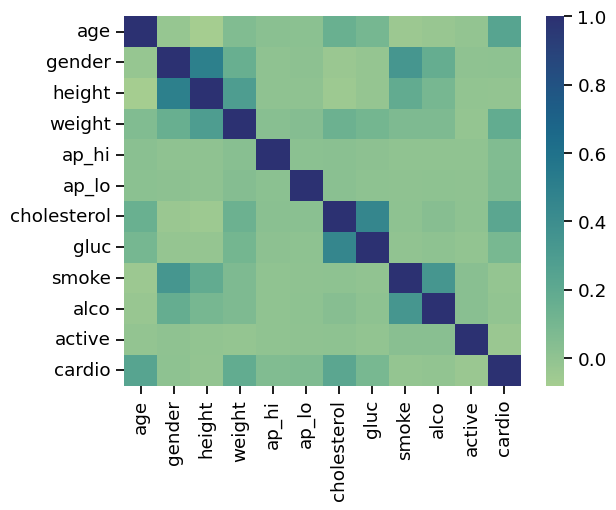

In [23]:
sns.heatmap(df.corr(), cmap="crest")

In [24]:
df.corr()

age    gender    height    weight     ap_hi     ap_lo   
age          1.000000 -0.022811 -0.081515  0.053684  0.020764  0.017647  \
gender      -0.022811  1.000000  0.499033  0.155406  0.006005  0.015254   
height      -0.081515  0.499033  1.000000  0.290968  0.005488  0.006150   
weight       0.053684  0.155406  0.290968  1.000000  0.030702  0.043710   
ap_hi        0.020764  0.006005  0.005488  0.030702  1.000000  0.016086   
ap_lo        0.017647  0.015254  0.006150  0.043710  0.016086  1.000000   
cholesterol  0.154424 -0.035821 -0.050226  0.141768  0.023778  0.024019   
gluc         0.098703 -0.020491 -0.018595  0.106857  0.011841  0.010806   
smoke       -0.047633  0.338135  0.187989  0.067780 -0.000922  0.005186   
alco        -0.029723  0.170966  0.094419  0.067113  0.001408  0.010601   
active      -0.009927  0.005866 -0.006570 -0.016867 -0.000033  0.004780   
cardio       0.238159  0.008109 -0.010821  0.181660  0.054475  0.065719   

             cholesterol      gluc     smoke      alco    active    cardio  
age             0.154424  0.098703 -0.047633 -0.029723 -0.009927  0.238159  
gender         -0.035821 -0.020491  0.338135  0.170966  0.005866  0.008109  
height         -0.050226 -0.018595  0.187989  0.094419 -0.006570 -0.010821  
weight          0.141768  0.106857  0.067780  0.067113 -0.016867  0.181660  
ap_hi           0.023778  0.011841 -0.000922  0.001408 -0.000033  0.054475  
ap_lo           0.024019  0.010806  0.005186  0.010601  0.004780  0.065719  
cholesterol     1.000000  0.451578  0.010354  0.035760  0.009911  0.221147  
gluc            0.451578  1.000000 -0.004756  0.011246 -0.006770  0.089307  
smoke           0.010354 -0.004756  1.000000  0.340094  0.025858 -0.015486  
alco            0.035760  0.011246  0.340094  1.000000  0.025476 -0.007330  
active          0.009911 -0.006770  0.025858  0.025476  1.000000 -0.035653  
cardio          0.221147  0.089307 -0.015486 -0.007330 -0.035653  1.000000

Дві ознаки, які найбільше корелюють - gender та weight

Побудуємо графік (violinplot) розподіл росту людини за гендерною ознакою. Використаємо параметри: 
hue - для розбивки за статтю; 
scale - для оцінки кількості кожної статі.
Перетворюємо DataFrame в «Long Format»-представлення за допомогою функції melt в pandas

In [25]:
longformat = pd.melt(frame=df, value_vars='height',id_vars='gender')
longformat.head()

gender variable  value
0       2   height    168
1       1   height    156
2       1   height    165
3       2   height    169
4       1   height    156

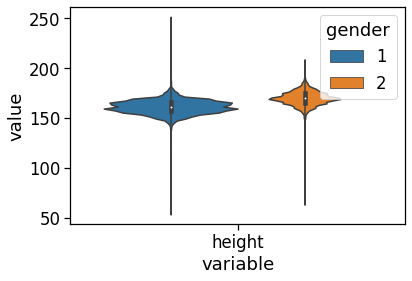

In [ ]:
sns.violinplot(data=longformat, x='variable', y='value', hue='gender', scale='count'); 
plt.show()

Побудуємо на одному графіку два окремих kdeplot росту і ваги, окремо для чоловіків і жінок. На ньому різниця буде більш наочною, але не можна буде оцінити кількість чоловіків / жінок.

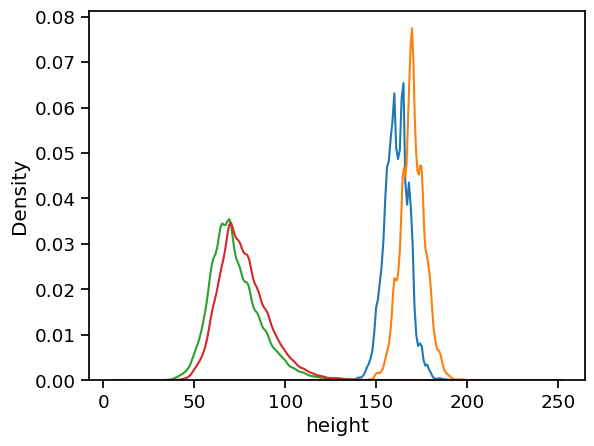

In [26]:
sns.kdeplot(df[df['gender'] == 1]['height']) 
sns.kdeplot(df[df['gender'] == 2]['height']) 
sns.kdeplot(df[df['gender'] == 1]['weight']) 
sns.kdeplot(df[df['gender'] == 2]['weight']) 
plt.show() 

Побудуємо кореляційну матрицю, використовуючи коефіцієнт Спірмена.

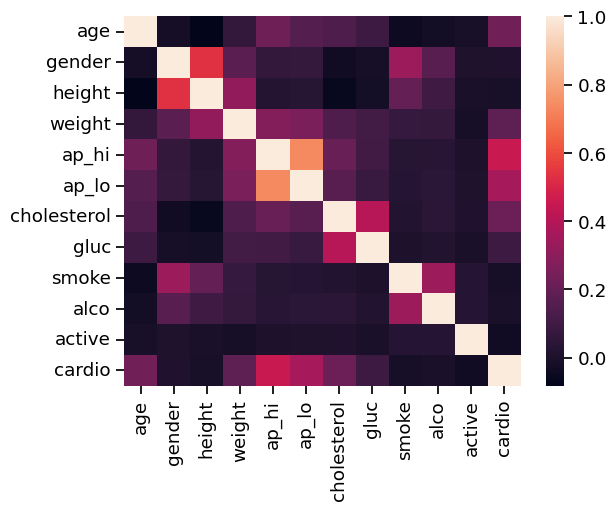

age    gender    height    weight     ap_hi     ap_lo   
age          1.000000 -0.020176 -0.082292  0.061559  0.219087  0.156700  \
gender      -0.020176  1.000000  0.533805  0.172480  0.063174  0.066374   
height      -0.082292  0.533805  1.000000  0.313569  0.019381  0.030534   
weight       0.061559  0.172480  0.313569  1.000000  0.277749  0.254420   
ap_hi        0.219087  0.063174  0.019381  0.277749  1.000000  0.735436   
ap_lo        0.156700  0.066374  0.030534  0.254420  0.735436  1.000000   
cholesterol  0.140113 -0.035730 -0.058940  0.137908  0.208722  0.167401   
gluc         0.091791 -0.018866 -0.024369  0.109901  0.105334  0.082474   
smoke       -0.047471  0.338135  0.197632  0.071676  0.028929  0.026172   
alco        -0.030078  0.170966  0.096670  0.068088  0.033243  0.038862   
active      -0.010422  0.005866 -0.007367 -0.014894 -0.001268  0.003401   
cardio       0.234429  0.008109 -0.012383  0.182701  0.451885  0.362572   

             cholesterol      gluc     smoke      alco    active    cardio  
age             0.140113  0.091791 -0.047471 -0.030078 -0.010422  0.234429  
gender         -0.035730 -0.018866  0.338135  0.170966  0.005866  0.008109  
height         -0.058940 -0.024369  0.197632  0.096670 -0.007367 -0.012383  
weight          0.137908  0.109901  0.071676  0.068088 -0.014894  0.182701  
ap_hi           0.208722  0.105334  0.028929  0.033243 -0.001268  0.451885  
ap_lo           0.167401  0.082474  0.026172  0.038862  0.003401  0.362572  
cholesterol     1.000000  0.407803  0.015220  0.041285  0.007573  0.215117  
gluc            0.407803  1.000000  0.000468  0.018584 -0.008610  0.091488  
smoke           0.015220  0.000468  1.000000  0.340094  0.025858 -0.015486  
alco            0.041285  0.018584  0.340094  1.000000  0.025476 -0.007330  
active          0.007573 -0.008610  0.025858  0.025476  1.000000 -0.035653  
cardio          0.215117  0.091488 -0.015486 -0.007330 -0.035653  1.000000

In [27]:
sns.heatmap(df.corr(method='spearman'))
plt.show() 
df.corr(method='spearman')

Побудуємо Countplot, де на осі абсцис буде відзначений вік, на осі ординат - кількість. Кожне значення віку повинне мати два стовпці, що відповідають кількості осіб кожного класу cardio (здоровий / хворий) даного віку.

<Axes: xlabel='age_years', ylabel='count'>

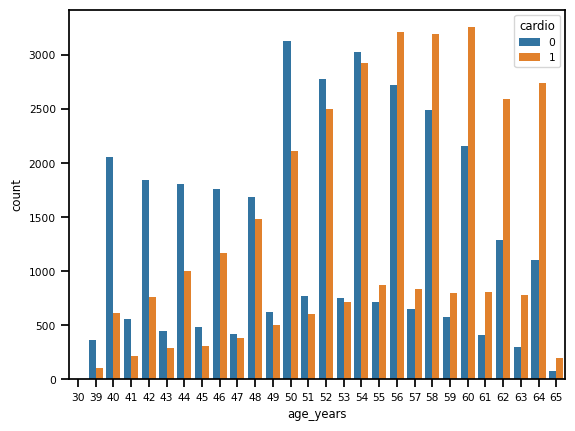

In [29]:
sns.set_context(
    "notebook",
    font_scale = 0.7,) 

df['age_years'] = ((df['age']/365.25).round().astype('int64'))
sns.countplot(x='age_years', hue='cardio', data=df)



В якому віці кількість пацієнтів з ССЗ вперше стає більше, ніж здорових?

У 55 років

### Завдання 3. Провести розвідувальний і візуальний аналіз за варіантами: 

Варіант 9

Завантажимо дані:

In [34]:
games = pd.read_csv('https://raw.githubusercontent.com/otacke/udacity-machine-learning-engineer/master/submissions/capstone_project/data/Video_Games_Sales_as_at_22_Dec_2016.csv')


Отримаємо загальну інформацію про прочитані дані:

In [35]:
print(games.shape)

(16719, 16)


In [37]:
games = games.dropna()
print(games.shape)

(6825, 16)


та звернемо увагу на типи полів:

In [ ]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6825 non-null   object 
 1   Platform         6825 non-null   object 
 2   Year_of_Release  6825 non-null   float64
 3   Genre            6825 non-null   object 
 4   Publisher        6825 non-null   object 
 5   NA_Sales         6825 non-null   float64
 6   EU_Sales         6825 non-null   float64
 7   JP_Sales         6825 non-null   float64
 8   Other_Sales      6825 non-null   float64
 9   Global_Sales     6825 non-null   float64
 10  Critic_Score     6825 non-null   float64
 11  Critic_Count     6825 non-null   float64
 12  User_Score       6825 non-null   object 
 13  User_Count       6825 non-null   float64
 14  Developer        6825 non-null   object 
 15  Rating           6825 non-null   object 
dtypes: float64(9), object(7)
memory usage: 906.4+ KB


In [ ]:
Не всі записи мають повні дані, тому залишимо тільки ті, по яким є повні дані:

In [38]:
print(games.head(10))

                         Name Platform  Year_of_Release     Genre   
0                  Wii Sports      Wii           2006.0    Sports  \
2              Mario Kart Wii      Wii           2008.0    Racing   
3           Wii Sports Resort      Wii           2009.0    Sports   
6       New Super Mario Bros.       DS           2006.0  Platform   
7                    Wii Play      Wii           2006.0      Misc   
8   New Super Mario Bros. Wii      Wii           2009.0  Platform   
11              Mario Kart DS       DS           2005.0    Racing   
13                    Wii Fit      Wii           2007.0    Sports   
14         Kinect Adventures!     X360           2010.0      Misc   
15               Wii Fit Plus      Wii           2009.0    Sports   

                 Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales   
0                 Nintendo     41.36     28.96      3.77         8.45  \
2                 Nintendo     15.68     12.76      3.79         3.29   
3                 Nin

Замінимо типи даних для полів Critic_Count, User_Count, User_Score, Year_of_Release 

In [41]:
games['User_Score'] = games.User_Score.astype('float64')
games['Year_of_Release'] = games.Year_of_Release.astype('int64')
games['User_Count'] = games.User_Count.astype('int64')
games['Critic_Count'] = games.Critic_Count.astype('int64')


In [42]:
print(games.head(10))

                         Name Platform  Year_of_Release     Genre   
0                  Wii Sports      Wii             2006    Sports  \
2              Mario Kart Wii      Wii             2008    Racing   
3           Wii Sports Resort      Wii             2009    Sports   
6       New Super Mario Bros.       DS             2006  Platform   
7                    Wii Play      Wii             2006      Misc   
8   New Super Mario Bros. Wii      Wii             2009  Platform   
11              Mario Kart DS       DS             2005    Racing   
13                    Wii Fit      Wii             2007    Sports   
14         Kinect Adventures!     X360             2010      Misc   
15               Wii Fit Plus      Wii             2009    Sports   

                 Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales   
0                 Nintendo     41.36     28.96      3.77         8.45  \
2                 Nintendo     15.68     12.76      3.79         3.29   
3                 Nin

Побудуємо графік продажів відеоігор у різних країнах в залежності від року:

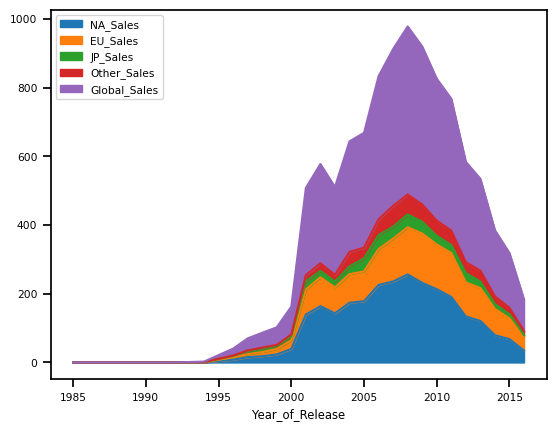

In [43]:
games[[x for x in games.columns if 'Sales' in x] +
   ['Year_of_Release']].groupby('Year_of_Release').sum().plot(kind='area');
plt.show();


Зясуємо як зв'язані між собою ('Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count') за допомогою Seaborn

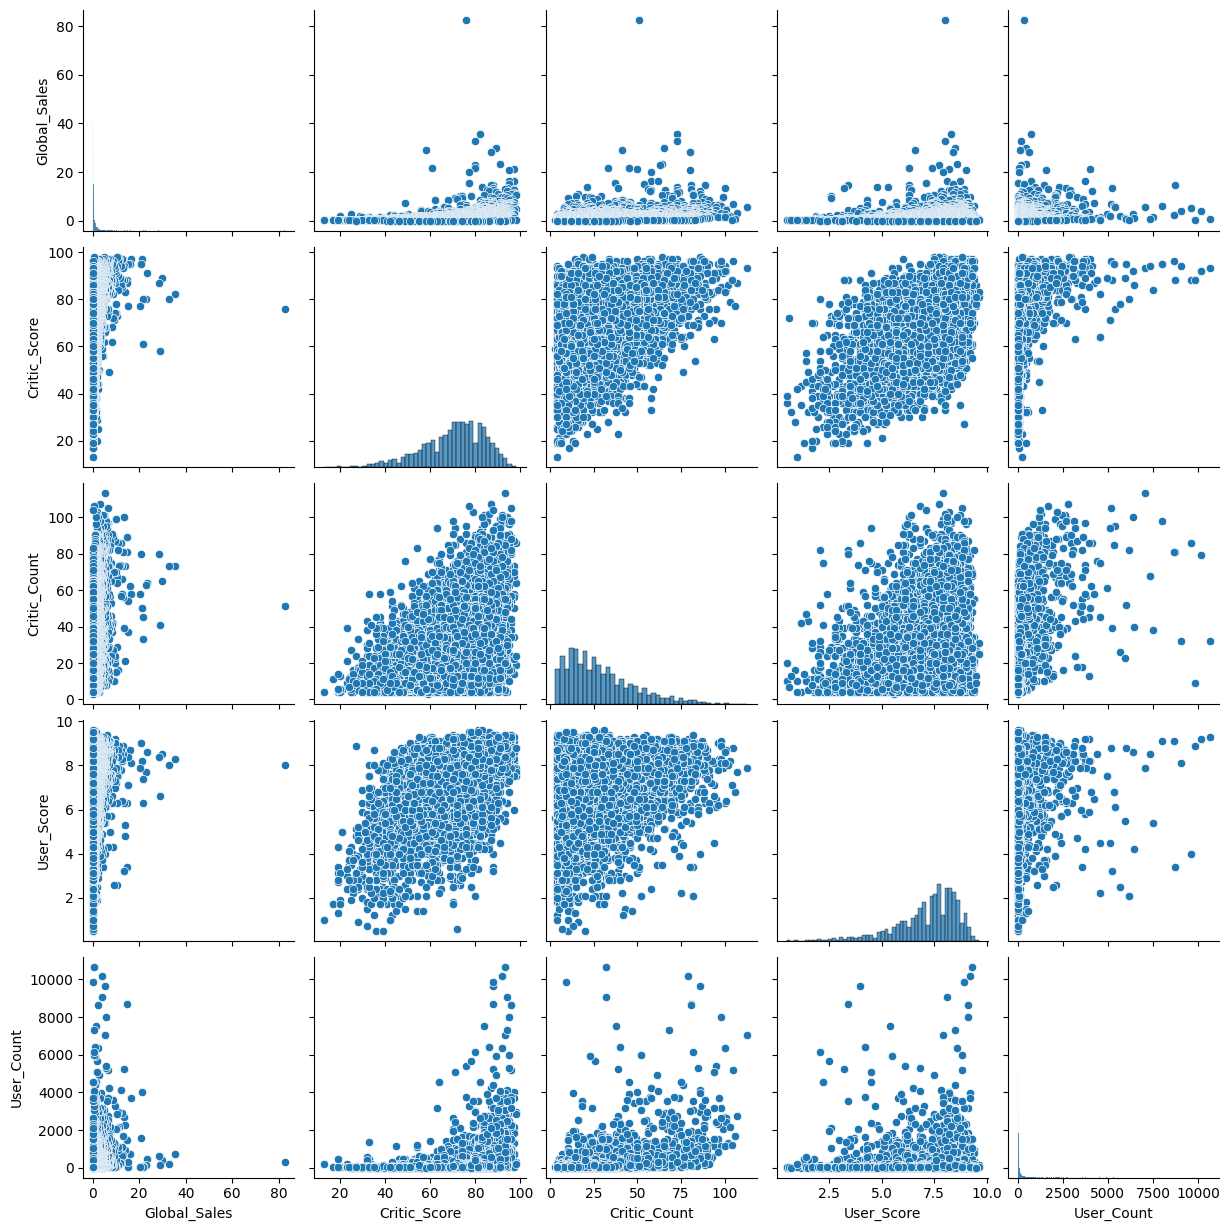

In [ ]:
sns.pairplot(games[['Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']]);

Можемо побачити, що є певна залежність Critic_Score та User_Score.

Подивимось на розподілення оцінок критиків Critic_Score:

<Axes: xlabel='Critic_Score', ylabel='Density'>

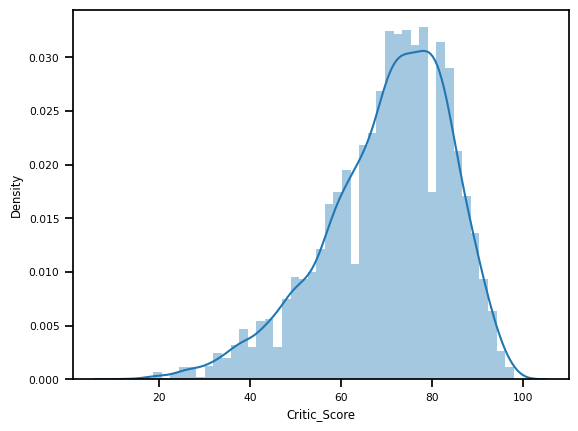

In [48]:
sns.distplot(games.Critic_Score)

In [ ]:
Подивимось на розподілення оцінок критиків User_Score:

<Axes: xlabel='User_Score', ylabel='Density'>

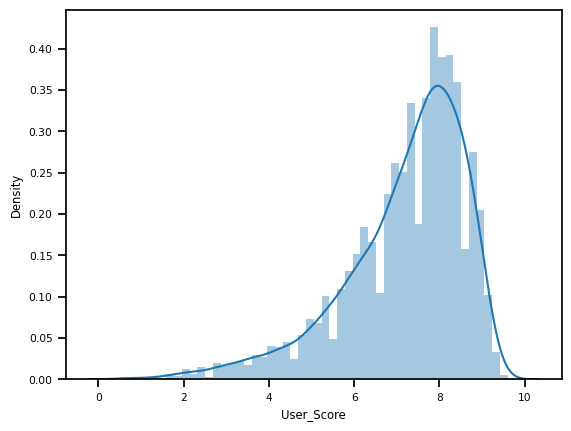

In [49]:
sns.distplot(games.User_Score)

Подивимось на взаємозв'язок  Critic_Score та User_Score:

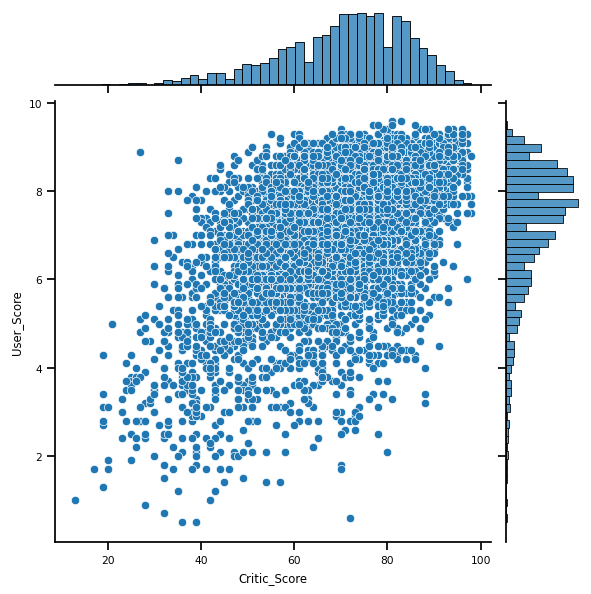

In [50]:
sns.jointplot(x='Critic_Score', y='User_Score', 
              data=games, kind='scatter')

Порівняємо користувацькі оцінки для топ5 найбільших гральних платформ за допомогою Box PLot:

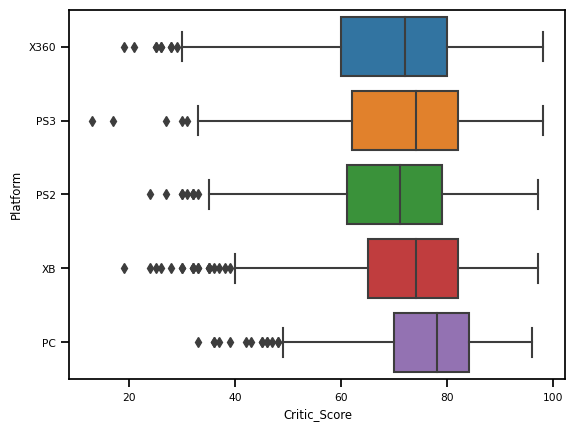

In [51]:
top_platforms = games.Platform.value_counts().sort_values(ascending = False).head(5).index.values

sns.boxplot(y="Platform", x="Critic_Score", 
            data=games[games.Platform.isin(top_platforms)], orient="h");

Візуалізуємо сумарні продажі ігор по жанрам та гральним платформам за допомогою heat map:

<Axes: xlabel='Genre', ylabel='Platform'>

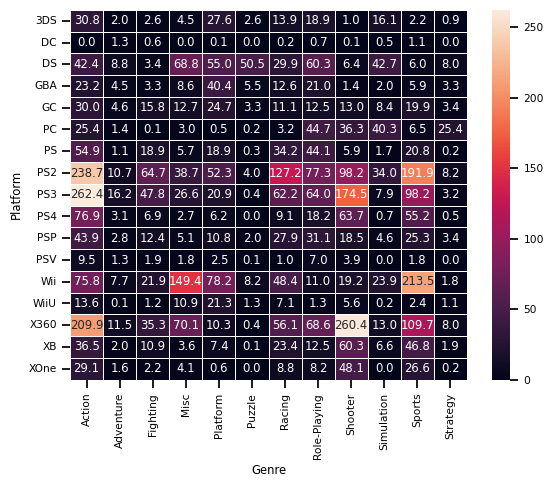

In [52]:
platform_genre_sales = games.pivot_table(
                        index='Platform', 
                        columns='Genre', 
                        values='Global_Sales', 
                        aggfunc=sum).fillna(0).applymap(float)
platform_genre_sales.head()
sns.heatmap(platform_genre_sales, annot=True, fmt=".1f", linewidths=.5)

### Контрольні запитання

#### 1. Для чого використовується «Long Format»- представлення?

"Long Format" представлення використовується для перетворення даних з широкого формату, де кожен стовпець представляє окрему змінну, у довгий формат, де один стовпець містить значення змінної, інший стовпець містить мітки цієї змінної. Це дозволяє легко виконувати аналіз і візуалізацію даних.

#### 2. За допомогою якого графіка можна дізнатися середнє значення (мат. очікування) і розкид значень (дисперсію) для різних категорій даних.

Для дізнавання середнього значення (математичного очікування) і розкиду значень (дисперсії) для різних категорій даних використовуються графіки box plot або violin plot.

#### 3. Опишіть основні елементи наступної діаграми і яким чином можна її отримати:

#### 4. Якщо використовувати метод DataFrame.plot() з параметром kind = 'bar', який вид діаграми можна отримати?

Використовуючи метод DataFrame.plot() з параметром kind='bar', можна отримати стовпчасту діаграму, де кожен стовпець представляє значення змінної.

#### 5. Тип графіків Pie Chart (Пиріжковий графік) відмінно підходить для відображення часток, які належать частини даних. Опішить метод побудови.

Графік "Pie Chart" (Пиріжковий графік) відображає частки, які належать різним категоріям, у вигляді круга, розбитого на сектори. Кожен сектор представляє окрему категорію, а його площа пропорційна частці цієї категорії у загальному наборі даних.

#### 6. Опишіть призначення графіка Heat Map (Теплова карта)

Теплова карта (Heat Map) використовується для візуалізації матриці даних, де кожен елемент матриці представлений кольором. Така карта дозволяє швидко виявити взаємозв'язки, закономірності та структуру даних за допомогою кольорових відтінків.

#### 7. Для чого призначені функції plt.show() і plt.draw()?

Функція plt.show() використовується для відображення графіків, що були побудовані за допомогою бібліотеки Matplotlib. Функція plt.draw() використовується для оновлення візуалізації графіків без їх повторного побудови.

#### 8. Як можна отримати наступний графік:

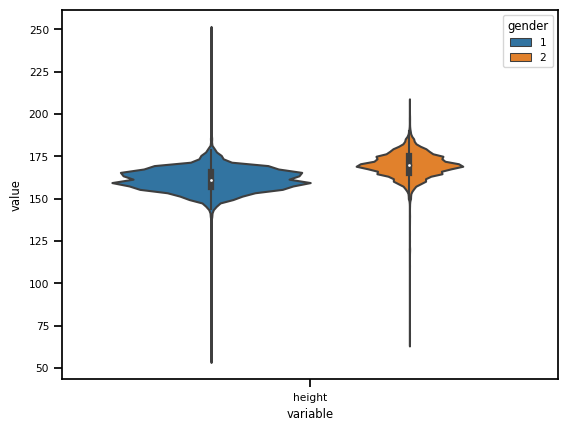

In [55]:
data = [ 
    ['Martinez', 'Elijah', '109-876-5432', '2', '10', '1984', 'M', 'Master', '3', 'Management'],
    ['Robinson', 'Harper', '876-543-2109', '16', '8', '1990', 'F', 'PhD', '8', 'Data Science'],
    ['Clark', 'Lucas', '543-210-9876', '22', '11', '1982', 'M', 'Bachelor', '5', 'Marketing'],
    ['Rodriguez', 'Mia', '210-987-6543', '4', '3', '1988', 'F', 'High School', '4', 'Accounting']
]

sns.violinplot(data=longformat, x='variable', y='value', hue='gender', scale='count'); 
plt.show()

#### 9. Який тип графіка можна отримати:
sns.pairplot(data=iris, hue="species")

За допомогою sns.pairplot() і аргументу hue="species", можна отримати графік парних співставлень, де кожен точковий графік представляє пару змінних, а різні категорії змінної "species" позначаються різними кольорами.